# *Grupo3 SRL*

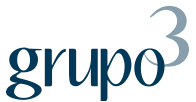

# Final 4º Bimestre Diplomatura UADE 

## Datos del Grupo (Ingrese los datos de los miembros del grupo)

### *Representantes comerciales*

Nombre y Apellido | LU
------------------|---


---


### Indice

1. __<a href='#0' target='_self'>Objetivos del notebook</a>__
1. __<a href='#1' target='_self'>Importamos Librerías</a>__
1. __<a href='#2' target='_self'>Conexión con el Datalake</a>__
1. __<a href='#3' target='_self'>Exportamos los csv</a>__

## <a id='0'>Objetivos del notebook</a>
- Importar los datos del datalake con los datos en csv de cada día tomado de Twitter
- Realizar la concatenación de los df
- Exportar los datos a un csv

## <a id='1'>1. Importamos las Librerías</a>

In [1]:
from datetime import datetime
now_i = datetime.now()

In [2]:
import pandas as pd 
import numpy as np
import os
from PIL import Image

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import TweetTokenizer
from pandarallel import pandarallel

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime as dt
from datetime import date

## <a id='2'>2. Conexión con el Datalake</a>

- Conectamos con el datalake 
- Tomamos los csv y armamos un df

In [3]:
PATH = "/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/raw/raw/"
path, dirs, files = next(os.walk(PATH))
file_count = len(files)
dataframes_list = []
for i in range(file_count):
    temp_df = pd.read_csv(path + files[i], index_col=0, encoding = 'latin1')
    dataframes_list.append(temp_df)
prueba = pd.DataFrame()
for i in range(len(dataframes_list)):
    prueba = pd.concat([prueba, dataframes_list[i]], ignore_index = True)

In [4]:
prueba.reset_index(drop='first')

,tidy_tweets,fecha,ignacio,lucila,walter,mora,maximiliano,constanza,maria laura,agustin,...,juliana,participante,tidier_tweets,tidiest_tweets,tidiest2_tweets,tokenized,sentimiento,304},{920,436}}\t#/;R_klmno
0,que viejo mitÃ³mano asqueroso alfa,"2022/11/28, 21:51:27",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,walter,que viejo mitÃ³mano asqueroso alfa,que viejo mitÃ³mano asqueroso alfa,que viejo mitomano asqueroso alfa,"['que', 'viejo', 'mitomano', 'asqueroso', 'alfa']",pos,NaN,NaN,NaN
1,wtf que hermosa juliana reina vos volves en e...,"2022/11/28, 21:51:29",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,juliana,wtf que hermosa juliana reina vos volves en e...,wtf que hermosa juliana reina vos volves en e...,wtf que hermosa juliana reina vos volves en e...,"['wtf', 'que', 'hermosa', 'juliana', 'reina', ...",neg,NaN,NaN,NaN
2,una boludez por lo que la sacaron a juliana i...,"2022/11/28, 21:51:30",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,juliana,una boludez por lo que la sacaron a juliana i...,una boludez por lo que la sacaron a juliana i...,una boludez por lo que la sacaron a juliana i...,"['una', 'boludez', 'por', 'lo', 'que', 'la', '...",neg,NaN,NaN,NaN
3,alfa que ganas de que te vayas viejo de mierda...,"2022/11/28, 21:51:30",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,walter,alfa que ganas de que te vayas viejo de mierda...,alfa que ganas de que te vayas viejo de mierda,alfa que ganas de que te vayas viejo de mierda,"['alfa', 'que', 'ganas', 'de', 'que', 'te', 'v...",pos,NaN,NaN,NaN
4,que diosa juliana 2022,"2022/11/28, 21:51:30",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,juliana,que diosa juliana 2022,que diosa juliana 2022,que diosa juliana 2022,"['que', 'diosa', 'juliana', '2022']",pos,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138652,dios ahora va a estar difÃ­cil sacarla a cata...,"2022/11/28, 00:01:38",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,maria laura,dios ahora va a estar difÃ­cil sacarla a cata...,dios ahora va a estar difÃ­cil sacarla a cata...,dios ahora va a estar dificil sacarla a cata ...,"['dios', 'ahora', 'va', 'a', 'estar', 'dificil...",neg,NaN,NaN,NaN
138653,tengo una bronca. ya ni me acuerdo que mierda ...,"2022/11/28, 00:01:39",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,juliana,tengo una bronca. ya ni me acuerdo que mierda ...,tengo una bronca ya ni me acuerdo que mierda h...,tengo una bronca ya ni me acuerdo que mierda h...,"['tengo', 'una', 'bronca', 'ya', 'ni', 'me', '...",pos,NaN,NaN,NaN
138654,ðï¸ la nueva eliminada de la casa es ju...,"2022/11/28, 00:01:39",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,juliana,ðï¸ la nueva eliminada de la casa es ju...,la nueva eliminada de la casa es juliana t...,la nueva eliminada de la casa es juliana t...,"['la', 'nueva', 'eliminada', 'de', 'la', 'casa...",pos,NaN,NaN,NaN
138655,los viudas de juliana,"2022/11/28, 00:01:39",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,juliana,los viudas de juliana,los viudas de juliana,los viudas de juliana,"['los', 'viudas', 'de', 'juliana']",pos,NaN,NaN,NaN


In [5]:
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138657 entries, 0 to 138656
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tidy_tweets           138656 non-null  object 
 1   fecha                 138656 non-null  object 
 2   ignacio               138656 non-null  float64
 3   lucila                138656 non-null  float64
 4   walter                138656 non-null  float64
 5   mora                  138656 non-null  float64
 6   maximiliano           138656 non-null  float64
 7   constanza             138656 non-null  float64
 8   maria laura           138656 non-null  float64
 9   agustin               138656 non-null  float64
 10  tomas                 138656 non-null  float64
 11  juan                  138656 non-null  float64
 12  martina               138656 non-null  float64
 13  daniela               138656 non-null  float64
 14  julieta               138656 non-null  float64
 15  

In [6]:
# Borramos errores de importación
prueba.drop(prueba.columns[-3:], axis = 1)

,tidy_tweets,fecha,ignacio,lucila,walter,mora,maximiliano,constanza,maria laura,agustin,...,thiago,romina,alexis,juliana,participante,tidier_tweets,tidiest_tweets,tidiest2_tweets,tokenized,sentimiento
0,que viejo mitÃ³mano asqueroso alfa,"2022/11/28, 21:51:27",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,walter,que viejo mitÃ³mano asqueroso alfa,que viejo mitÃ³mano asqueroso alfa,que viejo mitomano asqueroso alfa,"['que', 'viejo', 'mitomano', 'asqueroso', 'alfa']",pos
1,wtf que hermosa juliana reina vos volves en e...,"2022/11/28, 21:51:29",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,juliana,wtf que hermosa juliana reina vos volves en e...,wtf que hermosa juliana reina vos volves en e...,wtf que hermosa juliana reina vos volves en e...,"['wtf', 'que', 'hermosa', 'juliana', 'reina', ...",neg
2,una boludez por lo que la sacaron a juliana i...,"2022/11/28, 21:51:30",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,juliana,una boludez por lo que la sacaron a juliana i...,una boludez por lo que la sacaron a juliana i...,una boludez por lo que la sacaron a juliana i...,"['una', 'boludez', 'por', 'lo', 'que', 'la', '...",neg
3,alfa que ganas de que te vayas viejo de mierda...,"2022/11/28, 21:51:30",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,walter,alfa que ganas de que te vayas viejo de mierda...,alfa que ganas de que te vayas viejo de mierda,alfa que ganas de que te vayas viejo de mierda,"['alfa', 'que', 'ganas', 'de', 'que', 'te', 'v...",pos
4,que diosa juliana 2022,"2022/11/28, 21:51:30",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,juliana,que diosa juliana 2022,que diosa juliana 2022,que diosa juliana 2022,"['que', 'diosa', 'juliana', '2022']",pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138652,dios ahora va a estar difÃ­cil sacarla a cata...,"2022/11/28, 00:01:38",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,maria laura,dios ahora va a estar difÃ­cil sacarla a cata...,dios ahora va a estar difÃ­cil sacarla a cata...,dios ahora va a estar dificil sacarla a cata ...,"['dios', 'ahora', 'va', 'a', 'estar', 'dificil...",neg
138653,tengo una bronca. ya ni me acuerdo que mierda ...,"2022/11/28, 00:01:39",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,juliana,tengo una bronca. ya ni me acuerdo que mierda ...,tengo una bronca ya ni me acuerdo que mierda h...,tengo una bronca ya ni me acuerdo que mierda h...,"['tengo', 'una', 'bronca', 'ya', 'ni', 'me', '...",pos
138654,ðï¸ la nueva eliminada de la casa es ju...,"2022/11/28, 00:01:39",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,juliana,ðï¸ la nueva eliminada de la casa es ju...,la nueva eliminada de la casa es juliana t...,la nueva eliminada de la casa es juliana t...,"['la', 'nueva', 'eliminada', 'de', 'la', 'casa...",pos
138655,los viudas de juliana,"2022/11/28, 00:01:39",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,juliana,los viudas de juliana,los viudas de juliana,los viudas de juliana,"['los', 'viudas', 'de', 'juliana']",pos


## <a id='3'>3. Exportamos los csv</a>
- Creamos dos df uno para visualización y otro para nube de palabras
- Exportamos ambos df a csv al datalake

In [7]:
df_final = prueba[['fecha', 'participante', 'sentimiento']]

In [8]:
df_final_wc = prueba[['fecha', 'participante', 'sentimiento',  'tidiest_tweets']]

In [9]:
df_final.to_csv('/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/consume/twitter_token_final.csv')

In [10]:
df_final_wc.to_csv('/Users/ri1965/Desktop/UADE/Bimestre_04/Tweeter/Datalake/consume/twitter_wordcloud.csv')

In [11]:
now_f = datetime.now()

In [12]:
diff = now_f-now_i

In [13]:
# Convierte objeto timedelta a minutos
diff_in_minutes = diff.total_seconds() / 60
# Redondeo de minutos
diff_in_minutes = round(diff_in_minutes)
print("Tiempo total de procesamiento: {} Minutes".format(diff_in_minutes) )

Tiempo total de procesamiento: 0 Minutes


## Aclaración
Este notebook almacena los csv en el datalake local para
- Ser fuente de datos para realizar las visualizaciones en Tableau
- Realizar nube de palabras con el notebook siguiente `Final_Diplo_v3`